<a href="https://colab.research.google.com/github/NarasimhanN/Recommendation-System/blob/main/Course_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE RECOMMENDATION SYSTEM

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting Data 

In [144]:
datasetPath = "/content/drive/MyDrive/IIIT B/RS/Course Recommendation System(1-162).xlsx"
rs_data = pd.read_excel(datasetPath)
rs_data

,ID,Start time,Completion time,Email,Name,Name(not mandatory)\n,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,6,2023-01-30 14:04:19,2023-01-30 14:05:54,anonymous,NaN,NaN,0.30,0.85,0.85,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,7,2023-01-30 14:04:44,2023-01-30 14:12:35,anonymous,NaN,Rahul Jain,0.70,0.80,0.20,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,8,2023-01-30 14:11:07,2023-01-30 14:12:47,anonymous,NaN,NaN,0.70,0.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,9,2023-01-30 19:10:54,2023-01-30 19:12:35,anonymous,NaN,Adrij Sharma,0.65,0.70,0.20,0.75,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,10,2023-01-30 22:58:02,2023-01-30 23:00:34,anonymous,NaN,NaN,0.70,0.60,0.20,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,163,2023-02-25 09:36:58,2023-02-25 09:39:26,anonymous,NaN,Shivankar Pilligundla,0.00,1.00,0.50,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,164,2023-02-25 10:32:07,2023-02-25 10:33:29,anonymous,NaN,NaN,1.00,0.00,0.00,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,165,2023-02-25 16:23:18,2023-02-25 16:25:04,anonymous,NaN,NaN,0.60,0.30,0.40,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,166,2023-02-27 09:46:02,2023-02-27 09:46:57,anonymous,NaN,NaN,0.80,0.60,0.20,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
cols_to_delete = {'ID',	'Start time','Completion time',	'Email',	'Name',	'Name(not mandatory)\n'}
rs_data.drop(columns=cols_to_delete,inplace=True)

In [146]:
rs_data 

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,NaN,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataPreprocessing 

Missing Values of Electives Can be handelled by 


1.   Assigning 0
2.   Assigning 0.5
3.   Do nothing








In [147]:
rs_data_final = rs_data.fillna(0) #Filling Empty Values By 0
# rs_data_final = rs_data.fillna(0.5) #Filling Empty Values By 0.5
# rs_data_final = rs_data #Do nothing                                    

In [148]:
rs_data_final

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.8,0.0
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.00,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Coding KMeans

In [149]:
# columns={'Course1','Course2','Course3','Course4','Course5'}
# dataa = pd.DataFrame(np.random.randint(101,size=(250,5))/10,columns=columns)
dataa = rs_data_final[:-32].copy()
dataa_test = rs_data_final[-32:].copy()
#dataa = rs_data_final.copy()
k=6
clusters = []


In [150]:
dataa

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.0,0.0,0.0
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.0,0.0,0.0
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.00,0.0,0.8,0.0
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.00,0.30,1.00,0.60,0.70,0.70,0.60,0.70,0.8,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.4,0.6,0.3
126,0.90,0.70,0.80,0.10,0.80,1.00,1.00,1.00,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
127,0.20,0.80,0.70,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
128,0.89,0.69,0.77,0.91,0.69,0.69,0.92,0.90,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.92,0.0,0.0,0.0


In [151]:
def init():
  '''1)Initialising K Clusters from the first k datapoints with the 5 core courses
     2)Assigning Random clusters to each datapoint '''
  for i in range(k):
    clusters.append(np.array(dataa.iloc[i][:5]))

  print("--------------------------------------------INIT------------------")
  print("No of Clusters : ",len(clusters))
 # print("## LOG : init : Final Clusters : ",clusters)

  initial_clusters = np.random.randint(0,k,len(dataa))
  dataa['cluster'] = initial_clusters

def findLoss(centroid,data):
  sum=0
  for i in range(len(centroid)):
    sum+=(centroid[i]-data[i])**2
  return sum

def assignCentroid(data):
  i=0
  distance=999999999
  cluster_no=-1
  for cnumber in range(k):
    #print("## LOG : assignCentroid : Centroid No : ",cnumber)
    centroid = clusters[cnumber]
    current_loss=findLoss(centroid,data)
    #print("## LOG : assignCentroid : Loss : ",current_loss)
    if(current_loss<distance):
      cluster_no=i
      distance=current_loss

    i=i+1
  print("##--------------------LOG INFO : assignCentroid : Assigned Cluster : ",cluster_no)
  return cluster_no,distance

def findCentroid(cluster_set):
  centroid = list()
  for i in cluster_set:
    centroid.append(cluster_set[i].mean())
  return centroid[:5]

def kMeans():
  iteration = 0
  while True:
    print("\n\n\n*************************************************************************** Iteration :",iteration)
    centroids_before = dataa['cluster'].copy()
    total_loss=0
    for i in range(len(dataa)):
      print("\n---------------------------------------------------------- \n#### LOG : KMeans : Data point No :",i," | Iteraton : ",iteration)
      dataa.loc[i,'cluster'],distance=assignCentroid(dataa.iloc[i])
      total_loss+=distance
    centroids_after = dataa['cluster']
    if(sum(centroids_after == centroids_before)==len(dataa)):
      print("## LOG : KMeans : Exiting as Convergence Achiced  | Iterration : ",iteration, "Total_Loss = ",total_loss)
      break # Convergence

    #Update Cluster Centroids
    for cnumber in range(k):
      print("\n^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ \n#### LOG : KMenas : Updating Centroid - Centroid Number : ",cnumber)
      print("## LOG : KMeans : Before : ",clusters[cnumber])
      clusters[cnumber]=findCentroid(dataa[dataa['cluster']==cnumber])
      print("## LOG : KMeans : After : ",clusters[cnumber])
    iteration+=1
  return total_loss  



Finding the best K Value :

In [152]:
# kMeansLossDict=dict()

# for i in range(1,40):
#   k=i
#   clusters=[]
#   init()
#   kMeansLossDict[k]=kMeans()

Streaming output truncated to the last 5000 lines.

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 88  | Iteraton :  2
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  3

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 89  | Iteraton :  2
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  35

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 90  | Iteraton :  2
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  6

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 91  | Iteraton :  2
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  4

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 92  | Iteraton :  2
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  24

-

In [153]:
# kMeansLossDict

{1: 123.6273698323668,
 2: 51.20911490560338,
 3: 41.757619054778615,
 4: 39.0387526116308,
 5: 31.68698542609633,
 6: 32.91982329068652,
 7: 26.396966494004538,
 8: 24.67396045408858,
 9: 22.507262368187536,
 10: 20.638578714368606,
 11: 19.746435504652396,
 12: 18.998190047942437,
 13: 17.797158110133875,
 14: 16.856730728168635,
 15: 15.198377145567036,
 16: 14.686156419071313,
 17: 14.478865324748964,
 18: 14.347505489735891,
 19: 13.870869802506453,
 20: 13.684661210542862,
 21: 13.402913591495242,
 22: 13.090469445363595,
 23: 11.972195018956667,
 24: 11.905968503805147,
 25: 11.412531685623335,
 26: 11.278781685623336,
 27: 10.806390257051905,
 28: 10.692117479274124,
 29: 10.757324477831117,
 30: 9.617395906402551,
 31: 9.17214590640255,
 32: 8.86551352545017,
 33: 8.815346858783505,
 34: 8.73141669176422,
 35: 8.590163358430887,
 36: 8.042163358430887,
 37: 8.08613669176422,
 38: 8.046553358430888,
 39: 8.046553358430888}

k=15 is the Best 

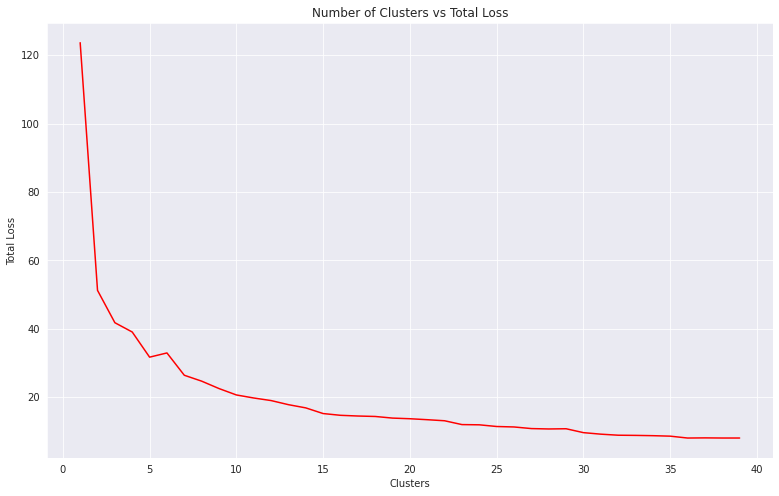

In [156]:
# x = kMeansLossDict.keys()
# y =kMeansLossDict.values()

# fig, axes = plt.subplots(figsize=(13,8))

# axes.plot(x, y, 'r')
# axes.set_xlabel('Clusters')
# axes.set_ylabel('Total Loss')
# axes.set_title('Number of Clusters vs Total Loss');

In [157]:
k=10 # Based on our Optimal Value
clusters=[]
init()
kMeans()

--------------------------------------------INIT------------------
No of Clusters :  10



*************************************************************************** Iteration : 0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 0  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 1  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  1

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 2  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  2

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 3  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  3

---------------------------------------------------------- 
#### L

20.638578714368606

## Make Recommendation Table

In [158]:
print("   Total Data Samples : ",len(dataa))
for i in range(k):
  print("Cluster No : ",i," | No of Samples : ",sum(dataa['cluster']==i))

   Total Data Samples :  130
Cluster No :  0  | No of Samples :  6
Cluster No :  1  | No of Samples :  11
Cluster No :  2  | No of Samples :  5
Cluster No :  3  | No of Samples :  9
Cluster No :  4  | No of Samples :  15
Cluster No :  5  | No of Samples :  27
Cluster No :  6  | No of Samples :  13
Cluster No :  7  | No of Samples :  14
Cluster No :  8  | No of Samples :  27
Cluster No :  9  | No of Samples :  3


In [159]:
rec_tab_data=[]

rec_table_cols = dataa.columns[5:-1]

for cnumber in range(k):
  cluster_set = dataa[dataa['cluster']==cnumber]
  res=[]
  for i in cluster_set:
    res.append(cluster_set[i].mean())
  rec_tab_data.append(res[5:-1])

rec_tab = pd.DataFrame(data=rec_tab_data,columns=rec_table_cols)
rec_tab

,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,Software Production Engineering\n,Computer Graphics\n,Data Visualization\n,Programming Languages\n,Cloud Computing\n,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.518759,0.497097,0.297097,0.296423,0.158759,0.200000,0.337311,0.242097,0.383333,0.493921,0.033333,0.016667,0.000000,0.000000,0.033333,0.166667,0.575277,0.233333,0.216667,0.200000
1,0.695455,0.500000,0.518182,0.263636,0.272727,0.418182,0.328182,0.290909,0.163636,0.281818,0.181818,0.272727,0.245455,0.200000,0.000000,0.227273,0.445455,0.190909,0.318182,0.200000
2,1.000000,1.000000,0.800000,0.400000,0.600000,0.480000,0.100000,0.240000,0.720000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.120000,0.140000,0.000000,0.240000
3,0.661111,0.505556,0.361111,0.266667,0.433333,0.500000,0.166667,0.411111,0.433333,0.355556,0.033333,0.044444,0.033333,0.033333,0.033333,0.255556,0.333333,0.211111,0.433333,0.555556
4,0.676667,0.633333,0.436667,0.429333,0.492667,0.683333,0.303333,0.330000,0.573333,0.513333,0.006667,0.026667,0.013333,0.006667,0.013333,0.033333,0.046667,0.060000,0.033333,0.253333
5,0.792593,0.744444,0.561481,0.309259,0.340741,0.418519,0.264815,0.250000,0.262963,0.311111,0.134074,0.130370,0.097778,0.124074,0.096296,0.057407,0.359259,0.122222,0.085185,0.124074
6,0.876923,0.807692,0.500000,0.676923,0.600000,0.584615,0.384615,0.453846,0.353846,0.361538,0.330769,0.315385,0.253846,0.253846,0.184615,0.111538,0.458462,0.263846,0.111538,0.484615
7,0.735714,0.650000,0.521429,0.278571,0.371429,0.378571,0.346429,0.378571,0.378571,0.314286,0.042857,0.035714,0.057143,0.035714,0.042857,0.207143,0.339286,0.228571,0.171429,0.407143
8,0.695926,0.700741,0.579630,0.387037,0.385185,0.418519,0.400000,0.474074,0.351852,0.374074,0.122222,0.129630,0.133333,0.122222,0.125926,0.200000,0.271111,0.214815,0.266667,0.244444
9,0.600000,0.533333,0.166667,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000


Recommadation Table With All Courses Data

In [160]:
rec_tab_data=[]

rec_table_cols = dataa.columns[:-1]

for cnumber in range(k):
  cluster_set = dataa[dataa['cluster']==cnumber]
  res=[]
  for i in cluster_set:
    res.append(cluster_set[i].mean())
  rec_tab_data.append(clusters[cnumber]+res[5:-1])

mega_rec_tab = pd.DataFrame(data=rec_tab_data,columns=rec_table_cols)
mega_rec_tab

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.354395,0.808333,0.827059,0.945421,0.897980,0.518759,0.497097,0.297097,0.296423,0.158759,...,0.033333,0.016667,0.000000,0.000000,0.033333,0.166667,0.575277,0.233333,0.216667,0.200000
1,0.936364,0.936364,0.127273,0.918182,0.790909,0.695455,0.500000,0.518182,0.263636,0.272727,...,0.181818,0.272727,0.245455,0.200000,0.000000,0.227273,0.445455,0.190909,0.318182,0.200000
2,0.560000,0.020000,0.980000,0.010000,0.920000,1.000000,1.000000,0.800000,0.400000,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.120000,0.140000,0.000000,0.240000
3,0.294444,0.655556,0.122222,0.883333,0.650000,0.661111,0.505556,0.361111,0.266667,0.433333,...,0.033333,0.044444,0.033333,0.033333,0.033333,0.255556,0.333333,0.211111,0.433333,0.555556
4,0.816667,0.393333,0.206667,0.086667,0.846667,0.676667,0.633333,0.436667,0.429333,0.492667,...,0.006667,0.026667,0.013333,0.006667,0.013333,0.033333,0.046667,0.060000,0.033333,0.253333
5,0.828889,0.810370,0.632963,0.622593,0.826667,0.792593,0.744444,0.561481,0.309259,0.340741,...,0.134074,0.130370,0.097778,0.124074,0.096296,0.057407,0.359259,0.122222,0.085185,0.124074
6,0.976923,0.961538,0.983846,0.084615,0.969231,0.876923,0.807692,0.500000,0.676923,0.600000,...,0.330769,0.315385,0.253846,0.253846,0.184615,0.111538,0.458462,0.263846,0.111538,0.484615
7,0.714286,0.171429,0.371429,0.728571,0.842857,0.735714,0.650000,0.521429,0.278571,0.371429,...,0.042857,0.035714,0.057143,0.035714,0.042857,0.207143,0.339286,0.228571,0.171429,0.407143
8,0.945926,0.815185,0.906296,0.892963,0.853333,0.695926,0.700741,0.579630,0.387037,0.385185,...,0.122222,0.129630,0.133333,0.122222,0.125926,0.200000,0.271111,0.214815,0.266667,0.244444
9,0.666667,0.900000,0.866667,0.066667,0.133333,0.600000,0.533333,0.166667,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000


## SVD

In [161]:
#Implement SVD From Here on l

In [162]:
#Dont go below here

In [163]:
clusters = np.array(mega_rec_tab)[:,:5]
clusters

array([[0.35439473, 0.80833333, 0.82705894, 0.9454214 , 0.89797961],
       [0.93636364, 0.93636364, 0.12727273, 0.91818182, 0.79090909],
       [0.56      , 0.02      , 0.98      , 0.01      , 0.92      ],
       [0.29444444, 0.65555556, 0.12222222, 0.88333333, 0.65      ],
       [0.81666667, 0.39333333, 0.20666667, 0.08666667, 0.84666667],
       [0.82888889, 0.81037037, 0.63296296, 0.62259259, 0.82666667],
       [0.97692308, 0.96153846, 0.98384615, 0.08461538, 0.96923077],
       [0.71428571, 0.17142857, 0.37142857, 0.72857143, 0.84285714],
       [0.94592593, 0.81518519, 0.9062963 , 0.89296296, 0.85333333],
       [0.66666667, 0.9       , 0.86666667, 0.06666667, 0.13333333]])

In [178]:
cols = mega_rec_tab.columns[:5]
rec_tab = mega_rec_tab.drop(columns=cols)
rec_tab

,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,Software Production Engineering\n,Computer Graphics\n,Data Visualization\n,Programming Languages\n,Cloud Computing\n,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.518759,0.497097,0.297097,0.296423,0.158759,0.200000,0.337311,0.242097,0.383333,0.493921,0.033333,0.016667,0.000000,0.000000,0.033333,0.166667,0.575277,0.233333,0.216667,0.200000
1,0.695455,0.500000,0.518182,0.263636,0.272727,0.418182,0.328182,0.290909,0.163636,0.281818,0.181818,0.272727,0.245455,0.200000,0.000000,0.227273,0.445455,0.190909,0.318182,0.200000
2,1.000000,1.000000,0.800000,0.400000,0.600000,0.480000,0.100000,0.240000,0.720000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.120000,0.140000,0.000000,0.240000
3,0.661111,0.505556,0.361111,0.266667,0.433333,0.500000,0.166667,0.411111,0.433333,0.355556,0.033333,0.044444,0.033333,0.033333,0.033333,0.255556,0.333333,0.211111,0.433333,0.555556
4,0.676667,0.633333,0.436667,0.429333,0.492667,0.683333,0.303333,0.330000,0.573333,0.513333,0.006667,0.026667,0.013333,0.006667,0.013333,0.033333,0.046667,0.060000,0.033333,0.253333
5,0.792593,0.744444,0.561481,0.309259,0.340741,0.418519,0.264815,0.250000,0.262963,0.311111,0.134074,0.130370,0.097778,0.124074,0.096296,0.057407,0.359259,0.122222,0.085185,0.124074
6,0.876923,0.807692,0.500000,0.676923,0.600000,0.584615,0.384615,0.453846,0.353846,0.361538,0.330769,0.315385,0.253846,0.253846,0.184615,0.111538,0.458462,0.263846,0.111538,0.484615
7,0.735714,0.650000,0.521429,0.278571,0.371429,0.378571,0.346429,0.378571,0.378571,0.314286,0.042857,0.035714,0.057143,0.035714,0.042857,0.207143,0.339286,0.228571,0.171429,0.407143
8,0.695926,0.700741,0.579630,0.387037,0.385185,0.418519,0.400000,0.474074,0.351852,0.374074,0.122222,0.129630,0.133333,0.122222,0.125926,0.200000,0.271111,0.214815,0.266667,0.244444
9,0.600000,0.533333,0.166667,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000


## Testing : 

In [165]:
def recommendTopX(test_data,top_X_courses): 
  '''For Training Data'''
  cluster_no,total_Loss  = assignCentroid(test_data)
  return rec_tab.iloc[int(cluster_no)].sort_values(ascending=False)[:top_X_courses]

In [166]:
test_data = dataa.iloc[10]
print(test_data)
result = recommendTopX(test_data,3)
print("\n\n\n--------------Top Courses  :\n\n",result)

Data Structures and Algorithms                                0.70
Computer Architecture\n                                       0.80
Discrete Mathematics\n                                        0.85
Economics                                                     0.50
Programming-2                                                 1.00
Machine Learning\n                                            0.70
Mathematics For Machine Learning\n                            0.75
Visual Recognition\n                                          0.00
Natural Language Processing\n                                 0.00
Reinforcement Learning                                        0.00
Software Production Engineering\n                             0.00
Computer Graphics\n                                           0.00
Data Visualization\n                                          0.00
Programming Languages\n                                       0.00
Cloud Computing\n                                             

In [167]:
test_data[5:-1].sort_values(ascending=False).unique()

array([0.75, 0.7 , 0.3 , 0.  ])

In [168]:
def evaluateInersectionOfSubjects(actual_subjects,predicted_subjects):
  count=0
  common_subs=list()
  for sub in actual_subjects:
    if sub in predicted_subjects:
      count+=1
      common_subs.append(sub)
  return common_subs,count

def validateResults(actual_data,topX):
  result = recommendTopX(actual_data,topX)
  print(" TOP ",topX," Subjects are : \n",result.sort_values(ascending=False))
  predicted_subjects = result.index
  print(" \n Predicted Subjects : \n",predicted_subjects)

  unique_vals = actual_data[5:-1].sort_values(ascending=False).unique()
  print("\n----------------Unique Values of ACtual Data : \n",unique_vals)
  print("\n---------------------\nActual Data Electives : \n",actual_data[5:-1].sort_values(ascending=False))

  if topX>len(unique_vals):
    actual_subjects = actual_data.index
  else:
    threshold = unique_vals[topX-1]
    print(" threshold : ",threshold)
    actual_subjects = actual_data[5:-1].where(lambda x : x>=threshold).dropna().index
  print("\n--------------\n Actual Subjects to Evaluate : \n",actual_subjects)
  print("\n\n Size of Actual Subjects to Evaluate : ",len(actual_subjects))

  common_subs,count = evaluateInersectionOfSubjects(actual_subjects,predicted_subjects)
  print("\n-------------------- Common Subjects : \n",common_subs)
  print("\n Count : ",count)
  accuracy = count/topX*100
  print("\n Accuracy : ",accuracy,"%")
  return accuracy
    
def plot_Accuracy(accuracy_list,overall_Accuracy,type_of_data):
  print("\n")
  sns.set_style(style="darkgrid")
  fig, axes = plt.subplots(figsize=(5,5))
  title_str = "#Clusters = "+str(k)+"| Top "+str(topXSubjects)+" Courses | Overall Accuracy = "+'%.2f'%overall_Accuracy+"% on "+type_of_data+" data"
  plt.title(title_str)
  plt.xlabel("Accuracy")
  plt.ylabel("Count")
  
  # Display on Bar plot
  # abs_values = pd.Series(accuracy_list).value_counts(ascending=True).values
  sns.countplot(accuracy_list,palette="mako")
  # ax.bar_label(container=ax.containers[0], labels=abs_values)


In [169]:
topXSubjects=3
accuracy_list_train=list()
for i in range(len(dataa)): #For Training Data
  print("\n********************************************\n data point : ",i+1)
  accuracy_list_train.append(int(validateResults(dataa.iloc[i],topXSubjects)))

accuracy_list_test=list()
for i in range(len(dataa_test)): #For Testing Data
  print("\n********************************************\n data point : ",i+1)
  accuracy_list_test.append(int(validateResults(dataa_test.iloc[i],topXSubjects)))

overall_accuracy_train = sum(accuracy_list_train)/len(accuracy_list_train)
overall_accuracy_test = sum(accuracy_list_test)/len(accuracy_list_test)
print("\n Overall Train Accuracy : ",overall_accuracy_train)
print("\n Overall Test Accuracy : ",overall_accuracy_test)

Streaming output truncated to the last 5000 lines.
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind ', 'cluster'],
      dtype='object')


 Size of Actual Subjects to Evaluate :  26

-------------------- Common Subjects : 
 ['Machine Learning\n', 'Mathematics For Machine Learning\n', 'Natural Language Processing\n']

 Count :  3

 Accuracy :  100.0 %

********************************************
 data point :  84
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  6
 TOP  3  Subjects are : 
 Machine Learning\n                    0.876923
Mathematics For Machine Learning\n    0.807692
Natural Language Processing\n         0.676923
Name: 6, dtype: float64
 
 Predicted Subjects : 
 Index(['Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Natural Language Processing\n'],
      dty

## Visualisations

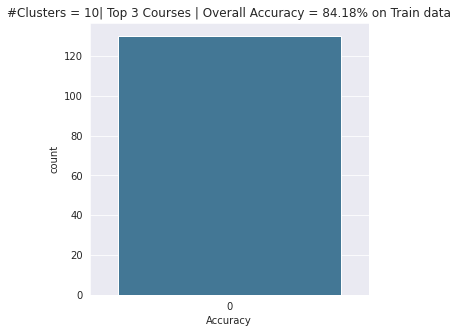

In [170]:
plot_Accuracy(accuracy_list_train,overall_accuracy_train,"Train")

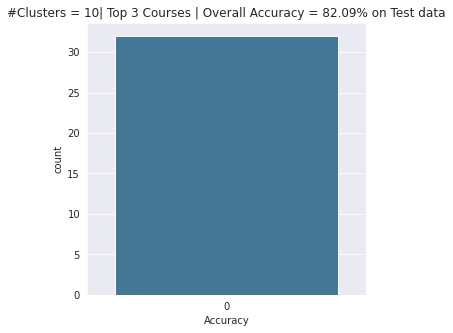

In [171]:
plot_Accuracy(accuracy_list_test,overall_accuracy_test,"Test")

In [183]:
test_data = [0,0,0,0,0]
recommendTopX(test_data,5)

##--------------------LOG INFO : assignCentroid : Assigned Cluster :  4


Software Production Engineering\n     0.683333
Machine Learning\n                    0.676667
Mathematics For Machine Learning\n    0.633333
Programming Languages\n               0.573333
Cloud Computing\n                     0.513333
Name: 4, dtype: float64

Report/Side:
Mention our analysis on differnet test_data 

In [173]:
dataa

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind,cluster
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.60,0.0,0.0,0.0,0
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,1
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.0,0.0,0.0,0.0,0.0,0.40,0.0,0.0,0.0,7
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.8,0.00,0.0,0.8,0.0,3
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.00,0.30,1.00,0.60,0.70,0.70,0.60,0.70,0.8,0.6,...,0.0,0.0,0.0,0.0,0.0,0.20,0.4,0.6,0.3,8
126,0.90,0.70,0.80,0.10,0.80,1.00,1.00,1.00,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,6
127,0.20,0.80,0.70,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9
128,0.89,0.69,0.77,0.91,0.69,0.69,0.92,0.90,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.92,0.0,0.0,0.0,8


## Sandbox

In [ ]:
# x = np.linspace(0, 50, 161)
# y = x ** 2

# fig, axes = plt.subplots(figsize=(8,5))

# axes.plot(x, y, 'r')
# axes.set_xlabel('x')
# axes.set_ylabel('y')
# axes.set_title('title');

In [ ]:
# cluster_set = dataa[dataa['cluster']==2]
# centroid = list()
# for i in cluster_set:
#   print("---------------\n\n",cluster_set[i])
#   centroid.append(cluster_set[i].mean())
# print(len(centroid[5:-1]))

In [ ]:
# def assignCentroidTest(data):
#   i=0
#   MIN=999999999
#   cluster_no=-1
#   for cnumber in range(len(clusters)):
#     print("## LOG : assignCentroid : Centroid No : ",cnumber)
#     centroid = clusters[cnumber]
#     current_loss=findLoss(centroid,data)
#     print("## LOG : assignCentroid : Loss : ",current_loss)
#     if(current_loss<MIN):
#       cluster_no = i
#       MIN=current_loss

#     i=i+1
#   print("##--------------------LOG INFO : assignCentroid : Assigned Cluster : ",cluster_no)
#   return cluster_no

# def recommendTopXTest(test_data,top_X_courses):
#   ''' For Testing Data with no Cluster Attribute'''
#   cluster_no  = assignCentroidTest(test_data)
#   return rec_tab.iloc[cluster_no].sort_values(ascending=False)[:top_X_courses]

# # test_data = dataa_test.iloc[-1]
# # print(test_data)
# # recommendTopXTest(test_data,4)